In [8]:
from nltk import CFG
from nltk.parse import ChartParser

grammar = CFG.fromstring("""
    E -> E '+' T | T
    T -> T '*' F | F
    F -> '(' E ')' | 'a'
""")


In [9]:
class CFG_Parser:
    def __init__(self, string):
        self.string = string
        self.index = 0

    def parse(self):
        return self.parse_E()

    def parse_E(self):
        if self.parse_T():
            if self.index < len(self.string) and self.string[self.index] == "+":
                self.index += 1
                return self.parse_E()
            return True
        return False

    def parse_T(self):
        if self.parse_F():
            if self.index < len(self.string) and self.string[self.index] == "*":
                self.index += 1
                return self.parse_T()
            return True
        return False

    def parse_F(self):
        if self.index < len(self.string) and self.string[self.index] == "(":
            self.index += 1
            if self.parse_E():
                if self.index < len(self.string) and self.string[self.index] == ")":
                    self.index += 1
                    return True
            return False
        return self.parse_a()

    def parse_a(self):
        if self.index < len(self.string) and self.string[self.index] == "a":
            self.index += 1
            return True
        return False

In [13]:
string = input("Enter the expression: ")
parser = CFG_Parser(string)
if parser.parse():
    print("Valid Expression")
    sent = list(string)
    parser = ChartParser(grammar)
    trees = list(parser.parse(sent))
    trees[0].draw()
else:
    print("Invalid Expression")

Valid Expression


### Parse Tree on output (a+a)*a
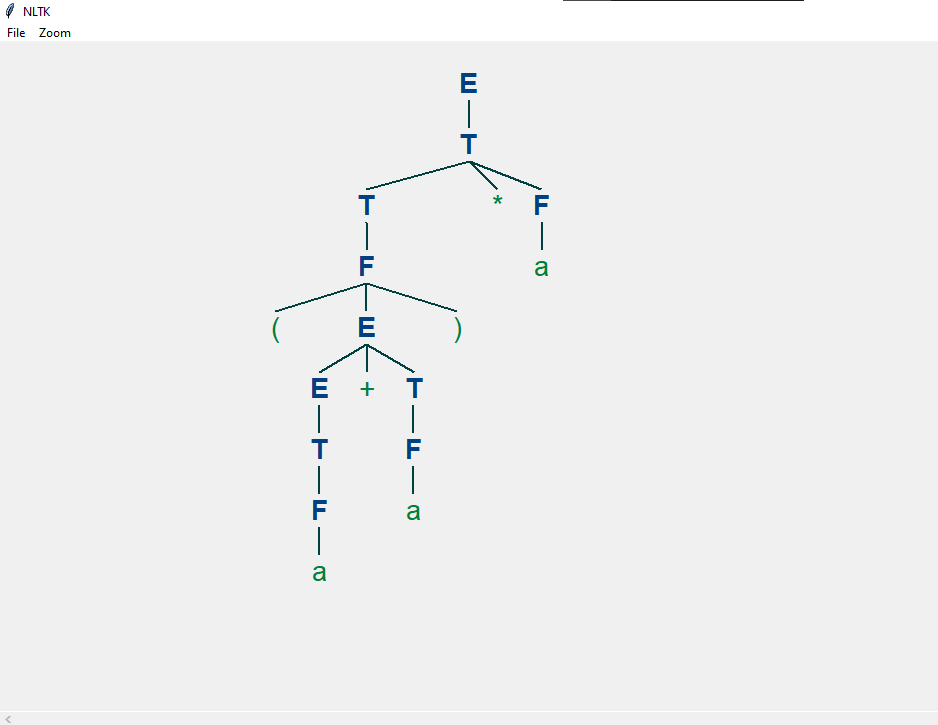